# Plot ACE2 expression vs Infectivity using mode MFI values

In [20]:
import os
import warnings

import pandas as pd
from plotnine import *
import seaborn

import yaml

In [21]:
warnings.simplefilter('ignore')

In [22]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [23]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [24]:
df = pd.read_csv(config['ACE2_expression_df'])


In [25]:
df

,cells,MFI (mode),RLU/ul,relative MFI,relative RLU/ul
0,high,60904,50877.35,1.000000,1.000000
1,medium,6344,39923.31,0.104164,0.784697
2,low,2255,8123.15,0.037025,0.159661
3,very low,1119,1830.92,0.018373,0.035987


In [26]:
cat_order = ['very low', 'low', 'medium', 'high']
df['cells'] = pd.Categorical(df['cells'], categories=cat_order, ordered=True)

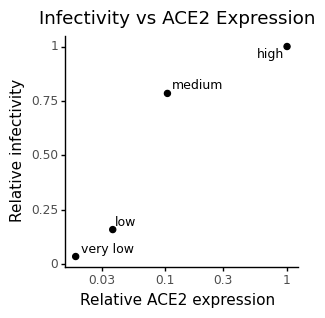

<ggplot: (8767864165265)>

In [27]:
(
    ggplot(df)+
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(mapping=aes(label='cells'),
               ha='left', 
               adjust_text={'expand_points': (1.2, 1.2),
                                    #'expand_text': (2.0, 2.0)
                           },
                size=9
              ) +
    
    theme_classic()+
    theme(figure_size=(3,3)) +
    labs(title = "Infectivity vs ACE2 Expression", x="Relative ACE2 expression", y="Relative infectivity") +
    scale_x_log10()
)


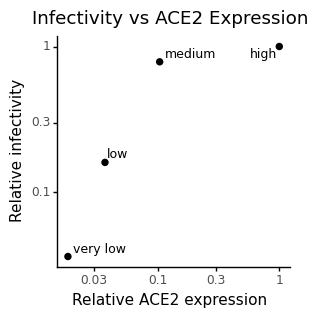

<ggplot: (8767864360677)>

In [28]:
# version with Y axis as log scale

(
    ggplot(df)+
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(mapping=aes(label='cells'),
               ha='left', 
               adjust_text={'expand_points': (1.2, 1.2),
                                    #'expand_text': (2.0, 2.0)
                           },
                size=9
              ) +
    
    theme_classic()+
    theme(figure_size=(3,3)) +
    labs(title = "Infectivity vs ACE2 Expression", x="Relative ACE2 expression", y="Relative infectivity") +
    scale_x_log10() +
    scale_y_log10()
)
